In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# 1. 데이터 적재

### 1) FLOW_AGE : 연령별 유동인구

In [2]:
dt = [201902, 201903, 201904, 201905, 202002, 202003, 202004, 202005]
list_of_df = []
for i in dt:
    fa = pd.read_csv("../../data/bigcontest/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_" + str(i) + ".csv", sep='|')
    list_of_df.append(fa)
FLOW_AGE = pd.concat(list_of_df)

In [3]:
FLOW_AGE.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09


### 2) FLOW_TIME : 시간별 유동인구

In [4]:
list_of_df = []
for i in dt:
    fa = pd.read_csv("../../data/bigcontest/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_TIME_" + str(i) + ".csv", sep='|')
    list_of_df.append(fa)
FLOW_TIME = pd.concat(list_of_df)

In [5]:
FLOW_TIME.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201902,20190201,1114052000,소공동,1496.35,1022.83,706.51,547.77,1673.02,3561.05,...,12355.91,13096.69,9317.64,15029.74,14135.83,9074.02,6032.26,6047.05,4806.65,2956.11
1,201902,20190201,1114054000,회현동,1692.37,1117.26,839.57,653.41,1920.52,4687.95,...,18210.30,20292.65,12527.29,21454.63,18214.50,11914.26,9800.64,9341.24,6884.91,4034.56
2,201902,20190201,1114055000,명동,2226.91,1726.10,1145.43,894.97,2513.32,5268.51,...,20332.71,21458.64,14434.56,25855.14,23107.23,13460.05,9797.40,8719.30,7203.45,4845.48
3,201902,20190201,1114057000,필동,698.73,440.70,385.99,275.64,497.41,1990.42,...,6900.66,9789.54,6205.74,13277.25,12101.51,5698.58,4464.46,4088.53,3385.14,1746.28
4,201902,20190201,1114058000,장충동,768.34,447.23,429.90,349.46,507.74,1310.67,...,5187.02,5211.60,3656.54,6841.98,5810.71,4463.99,2807.25,2626.12,2415.41,1398.94


# 2. 데이터 탐색

### 1) FLOW_AGE

- 16629행, 34열
- 5세 단위의 연령대로 표현되어있음
- 남자와 여자를 분리하여 count

In [6]:
FLOW_AGE.shape

(16629, 34)

In [7]:
#FLOW_AGE.info()

In [8]:
#FLOW_AGE.describe()

### 2) FLOW_TIME

- 16629행, 28열
- 한시간 단위의 시간대로 표현되어있음

# 3. 데이터 전처리

### 1) 날짜 형식으로 변환 : STD_YMD을 날짜타입으로

In [9]:
FLOW_AGE['STD_YMD'] = FLOW_AGE['STD_YMD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
FLOW_TIME['STD_YMD'] = FLOW_TIME['STD_YMD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

### 2) int를 str로 : STD_YM

In [10]:
#FLOW_AGE.dtypes
FLOW_AGE['STD_YM'] = FLOW_AGE['STD_YM'].astype(str)

In [11]:
#FLOW_TIME.dtypes
FLOW_TIME['STD_YM'] = FLOW_TIME['STD_YM'].astype(str)

### 3) 컬럼 행으로 stack

#### FLOW_AGE_DF : 연령대 & 성별로 표현된 컬럼 전부 행으로

In [12]:
FLOW_AGE_DF = FLOW_AGE.drop(['STD_YM','HDONG_NM'] ,axis =1)

In [13]:
FLOW_AGE_DF = FLOW_AGE_DF.melt(id_vars=["STD_YMD", "HDONG_CD"],
        var_name="POP", 
        value_name="CNT")

In [14]:
FLOW_AGE_DF.head()

,STD_YMD,HDONG_CD,POP,CNT
0,2019-02-01,1114052000,MAN_FLOW_POP_CNT_0004,16.64
1,2019-02-02,1114052000,MAN_FLOW_POP_CNT_0004,3.14
2,2019-02-03,1114052000,MAN_FLOW_POP_CNT_0004,1.38
3,2019-02-04,1114052000,MAN_FLOW_POP_CNT_0004,0.08
4,2019-02-05,1114052000,MAN_FLOW_POP_CNT_0004,0.00


#### FLOW_TIME_DF

In [15]:
FLOW_TIME_DF = FLOW_TIME.drop(['STD_YM','HDONG_NM'] ,axis =1)
FLOW_TIME_DF = FLOW_TIME_DF.melt(id_vars=["STD_YMD", "HDONG_CD"],
        var_name="TIME", 
        value_name="CNT")

In [16]:
FLOW_TIME_DF.head()

,STD_YMD,HDONG_CD,TIME,CNT
0,2019-02-01,1114052000,TMST_00,1496.35
1,2019-02-01,1114054000,TMST_00,1692.37
2,2019-02-01,1114055000,TMST_00,2226.91
3,2019-02-01,1114057000,TMST_00,698.73
4,2019-02-01,1114058000,TMST_00,768.34


### 5) 새로운 열 생성

#### 서울/ 대구 구 컬럼 생성

In [17]:
FLOW_AGE_DF['GU_NM'] = np.where(FLOW_AGE_DF.HDONG_CD < 1114069000, '서울 중구',
                           np.where(FLOW_AGE_DF.HDONG_CD < 1214000000,'서울 노원구',
                                    np.where(FLOW_AGE_DF.HDONG_CD < 2726050000,'대구 중구','대구 수성구')))

In [18]:
FLOW_TIME_DF['GU_NM'] = np.where(FLOW_TIME_DF.HDONG_CD < 1114069000, '서울 중구',
                           np.where(FLOW_TIME_DF.HDONG_CD < 1214000000,'서울 노원구',
                                    np.where(FLOW_TIME_DF.HDONG_CD < 2726050000,'대구 중구','대구 수성구')))

#### FLOW_AGE_DF 성별/ 연령대 컬럼 생성

In [19]:
# 성별
FLOW_AGE_DF['SEX'] = FLOW_AGE_DF['POP'].apply(lambda x : 'F' if x[0] == 'W' else 'M')

In [20]:
FLOW_AGE_DF['AGE'] = FLOW_AGE_DF['POP'].apply(lambda x : x[-4 :])

#### FLOW_TIME_DF 시간대 컬럼 생성

In [21]:
FLOW_TIME_DF['TIME'] = FLOW_TIME_DF['TIME'].apply(lambda x : x[-2 :])
FLOW_TIME_DF.head()

,STD_YMD,HDONG_CD,TIME,CNT,GU_NM
0,2019-02-01,1114052000,00,1496.35,서울 중구
1,2019-02-01,1114054000,00,1692.37,서울 중구
2,2019-02-01,1114055000,00,2226.91,서울 중구
3,2019-02-01,1114057000,00,698.73,서울 중구
4,2019-02-01,1114058000,00,768.34,서울 중구


#### WEEK_NUM 컬럼 추가

In [22]:
FLOW_AGE_DF['WEEK_NUM'] = FLOW_AGE_DF.STD_YMD.apply(lambda X: X.strftime('%V'))
FLOW_TIME_DF['WEEK_NUM'] = FLOW_TIME_DF.STD_YMD.apply(lambda X: X.strftime('%V'))

In [23]:
FLOW_AGE_DF['WEEK_NUM'].unique()

array(['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '21', '22'], dtype=object)

In [24]:
FLOW_TIME_DF.head()

,STD_YMD,HDONG_CD,TIME,CNT,GU_NM,WEEK_NUM
0,2019-02-01,1114052000,00,1496.35,서울 중구,05
1,2019-02-01,1114054000,00,1692.37,서울 중구,05
2,2019-02-01,1114055000,00,2226.91,서울 중구,05
3,2019-02-01,1114057000,00,698.73,서울 중구,05
4,2019-02-01,1114058000,00,768.34,서울 중구,05


In [25]:
FLOW_AGE_DF.head()

,STD_YMD,HDONG_CD,POP,CNT,GU_NM,SEX,AGE,WEEK_NUM
0,2019-02-01,1114052000,MAN_FLOW_POP_CNT_0004,16.64,서울 중구,M,0004,05
1,2019-02-02,1114052000,MAN_FLOW_POP_CNT_0004,3.14,서울 중구,M,0004,05
2,2019-02-03,1114052000,MAN_FLOW_POP_CNT_0004,1.38,서울 중구,M,0004,05
3,2019-02-04,1114052000,MAN_FLOW_POP_CNT_0004,0.08,서울 중구,M,0004,06
4,2019-02-05,1114052000,MAN_FLOW_POP_CNT_0004,0.00,서울 중구,M,0004,06


## 데이터 저장

In [26]:
FLOW_AGE_DF.to_csv('../../data/bigcontest/유동인구_정리.csv')

In [27]:
FLOW_TIME_DF.to_csv('../../data/bigcontest/유동인구_정리(시간대별).csv')

# 4. 분석

### 1) 구별 유동인구

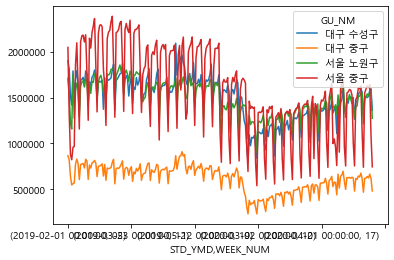

In [28]:
FLOW_AGE_DF.pivot_table(index=['STD_YMD','WEEK_NUM'], columns='GU_NM', values='CNT', aggfunc='sum').plot()

C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C6CD80A888> has a label of '_70U' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


Text(0.5, 1.0, '서울 중구')

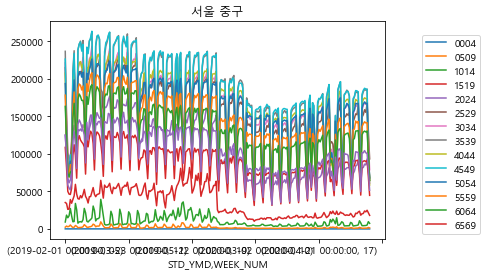

In [29]:
FLOW_AGE_DF[FLOW_AGE_DF.GU_NM == '서울 중구'].pivot_table(index=['STD_YMD','WEEK_NUM'], columns='AGE', values='CNT', aggfunc='sum').plot()
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))
plt.title('서울 중구')

C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C6CD91A348> has a label of '_70U' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


Text(0.5, 1.0, '서울 노원구')

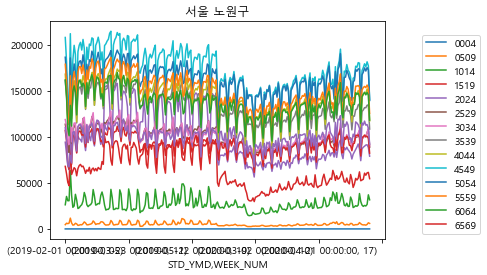

In [30]:
FLOW_AGE_DF[FLOW_AGE_DF.GU_NM == '서울 노원구'].pivot_table(index=['STD_YMD','WEEK_NUM'], columns='AGE', values='CNT', aggfunc='sum').plot()
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))
plt.title('서울 노원구')

C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C6CD9F6DC8> has a label of '_70U' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


Text(0.5, 1.0, '대구 중구')

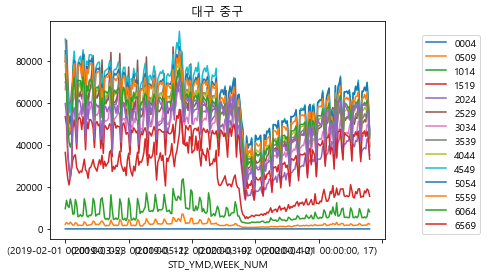

In [31]:
FLOW_AGE_DF[FLOW_AGE_DF.GU_NM == '대구 중구'].pivot_table(index=['STD_YMD','WEEK_NUM'], columns='AGE', values='CNT', aggfunc='sum').plot()
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))
plt.title('대구 중구')

C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C6CDACFB88> has a label of '_70U' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


Text(0.5, 1.0, '대구 수성구')

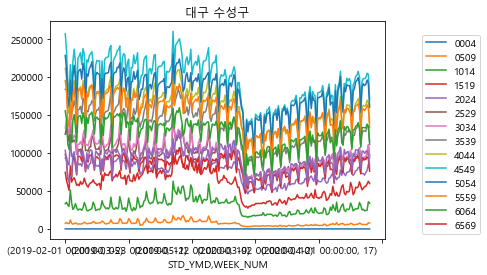

In [32]:
FLOW_AGE_DF[FLOW_AGE_DF.GU_NM == '대구 수성구'].pivot_table(index=['STD_YMD','WEEK_NUM'], columns='AGE', values='CNT', aggfunc='sum').plot()
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))
plt.title('대구 수성구')

### 2) 시간대 유동인구 AVG

Text(0.5, 1.0, '서울 중구')

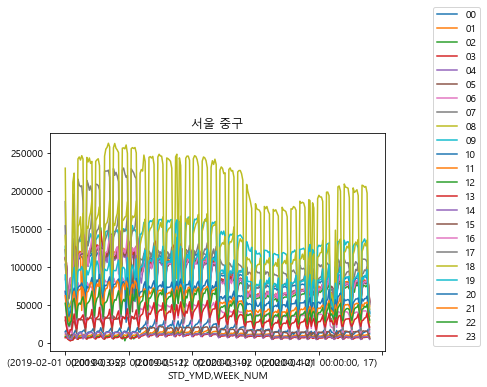

In [33]:
FLOW_TIME_DF[FLOW_TIME_DF.GU_NM == '서울 중구'].pivot_table(index=['STD_YMD','WEEK_NUM'], columns='TIME', values='CNT', aggfunc='sum').plot()
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))
plt.title('서울 중구')

Text(0.5, 1.0, '서울 노원구')

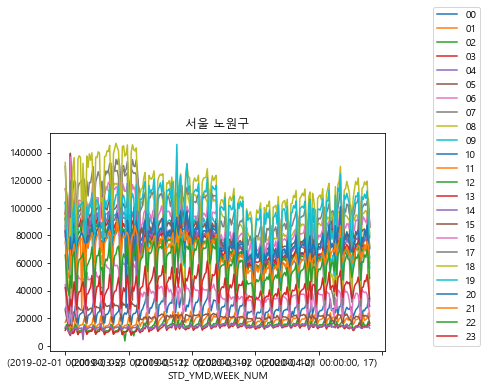

In [34]:
FLOW_TIME_DF[FLOW_TIME_DF.GU_NM == '서울 노원구'].pivot_table(index=['STD_YMD','WEEK_NUM'], columns='TIME', values='CNT', aggfunc='sum').plot()
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))
plt.title('서울 노원구')

Text(0.5, 1.0, '대구 중구')

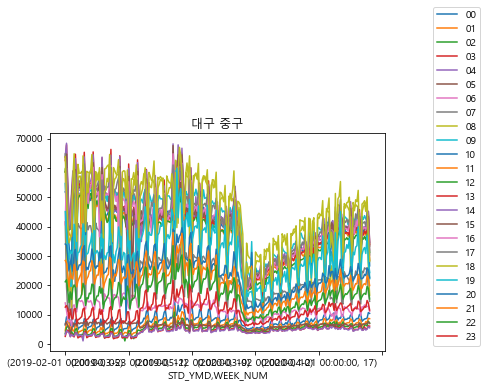

In [35]:
FLOW_TIME_DF[FLOW_TIME_DF.GU_NM == '대구 중구'].pivot_table(index=['STD_YMD','WEEK_NUM'], columns='TIME', values='CNT', aggfunc='sum').plot()
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))
plt.title('대구 중구')

Text(0.5, 1.0, '대구 수성구')

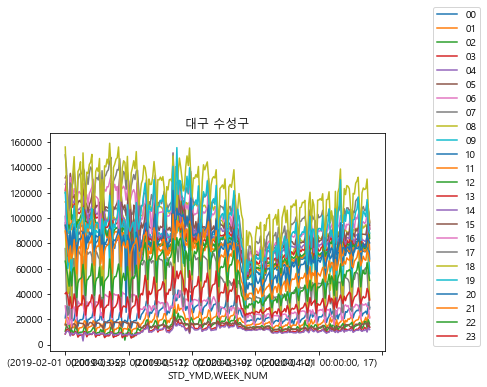

In [36]:
FLOW_TIME_DF[FLOW_TIME_DF.GU_NM == '대구 수성구'].pivot_table(index=['STD_YMD','WEEK_NUM'], columns='TIME', values='CNT', aggfunc='sum').plot()
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))
plt.title('대구 수성구')